In [9]:
import pandas as pd
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('./data/prep_train.csv')
val = pd.read_csv('./data/prep_val.csv')

In [3]:
df = pd.concat([train, val], axis=0)

<ipython-input-3-3da33b2cdfb5>:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([train, val], axis=0)


In [4]:
df = df.fillna(0)

In [5]:
df = df.loc[:, (df != 0).any(axis=0)]
df
#остается 79 колонок

,Class,Global argument overlap,Global noun overlap,Id,Local argument overlap,Local noun overlap,POS_ADJF_Text,POS_ADJS_Text,POS_ADVB_Text,POS_COMP_Text,...,Ср. количество слов в предложении,Ср. количество слогов в слове,Среднее количество предложений в абзаце,Среднее количество слов в предложении,Среднее количество слогов в слове,Средний ранг,Средняя длина слова в тексте,Существительных,Творительный падеж (СУЩ),Частотность (по словарю Шарова)
0,H,0.7,0.7,107559,1.0,1.0,12.0,0.0,2.0,0.0,...,17.00,2.28,5,17.000000,2.282353,10236.03,5.929412,39.0,1.0,209.47
1,H,0.0,0.0,107562,0.0,0.0,0.0,0.0,0.0,0.0,...,11.00,1.73,1,11.000000,1.727273,10919.38,5.000000,4.0,0.0,26.75
2,H,0.0,0.0,107563,0.0,0.0,2.0,0.0,0.0,0.0,...,15.00,2.60,1,15.000000,2.600000,8448.77,6.800000,8.0,0.0,371.58
3,M,0.0,0.0,107565,0.0,0.0,0.0,0.0,0.0,1.0,...,14.00,1.57,1,14.000000,1.571429,795.50,3.500000,0.0,0.0,378.18
4,H,0.0,0.0,107567,0.0,0.0,0.0,0.0,0.0,0.0,...,4.00,2.75,1,4.000000,2.750000,782.00,6.250000,2.0,0.0,251.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21506,H,0.0,0.0,215037,0.0,0.0,0.0,0.0,0.0,0.0,...,5.00,1.00,1,5.000000,1.000000,0.00,1.800000,0.0,0.0,0.00
21507,M,0.0,0.0,215040,0.0,0.0,1.0,0.0,0.0,0.0,...,12.00,2.33,1,12.000000,2.333333,4819.73,5.833333,7.0,2.0,472.05
21508,M,0.0,0.0,215052,0.0,0.0,9.0,0.0,2.0,0.0,...,26.67,2.24,2,26.666667,2.237500,9701.20,5.425000,31.0,3.0,327.38
21509,M,0.0,0.0,215087,0.0,0.0,2.0,2.0,0.0,0.0,...,26.00,1.88,1,26.000000,1.884615,9204.19,4.923077,7.0,0.0,632.06


In [106]:
def plot_graphics(df, col):
    plt.figure(figsize=(18, 8))

    plt.subplot(1,2,1)
    sns.boxenplot(x='Class', y=col, data=df)
    plt.ylabel(col)

    plt.subplot(1,2,2)
    sns.distplot(df.loc[df['Class'] == 'H', col], label='Human', bins=100)
    #plt.subplot(1,2,2)

    sns.distplot(df.loc[df['Class'] == 'M', col], label='Machine', bins=100)
    plt.legend()
    plt.ylabel('Density')
    plt.xlabel(col)
    plt.show()
    
def return_stat(df, col):
    return df.groupby(["Class"])[col].agg([np.mean, np.median, np.std, np.var]).rename(columns={'mean': 'Среднее', 'median': 'Медиана', 'std': 'Стандартное отклонение', 'var': 'Дисперсия'})

def ttest(df, col):
    stat, pvalue = stats.ttest_ind(df[df['Class'] == 'H'][col], df[df['Class'] == 'M'][col])
    if pvalue > 0.05:
        return f'Значимого отличия нет, pvalue = {pvalue:.2f}'
    else:
        return f'Есть значимое отличие в средних, pvalue = {pvalue:.2f}'
    
def mman(df, col):
    stat, pvalue = stats.mannwhitneyu(df[df['Class'] == 'H'][col], df[df['Class'] == 'M'][col])
    if pvalue > 0.05:
        return f'Значимого отличия нет, pvalue = {pvalue:.2f}'
    else:
        return f'Есть значимое отличие в средних, pvalue = {pvalue:.2f}'
    
def analyze_feature(df, col):
    plot_graphics(df, col)
    print(return_stat(df, col))
    print()
    print('T-test: ', ttest(df, col))
    print('Mann-Whitneyu: ', mman(df, col))

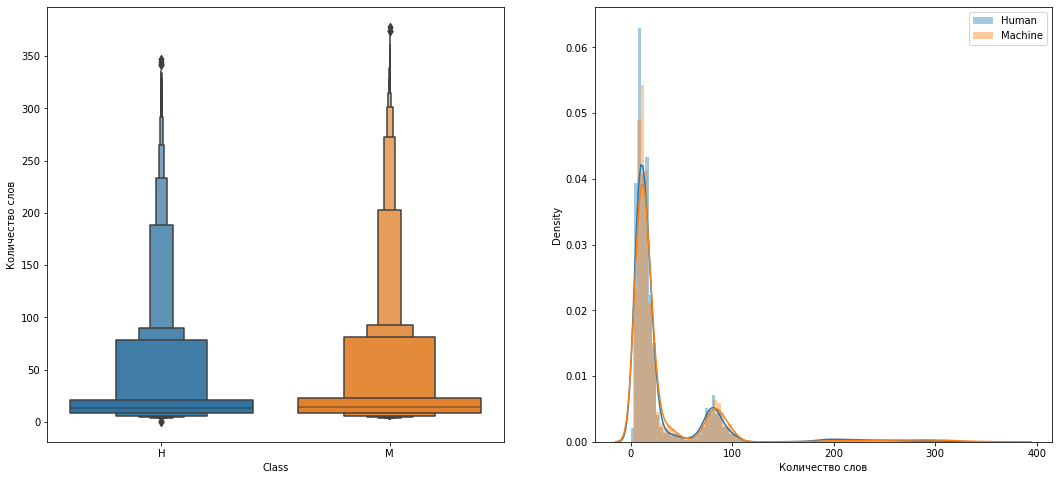

         Среднее  Медиана  Стандартное отклонение    Дисперсия
Class                                                         
H      30.054044     13.0               46.554080  2167.282389
M      32.321534     14.0               51.564829  2658.931602

T-test:  Есть значимое отличие в средних, pvalue = 0.00
Mann-Whitneyu:  Есть значимое отличие в средних, pvalue = 0.00


In [107]:
analyze_feature(df, 'Количество слов')

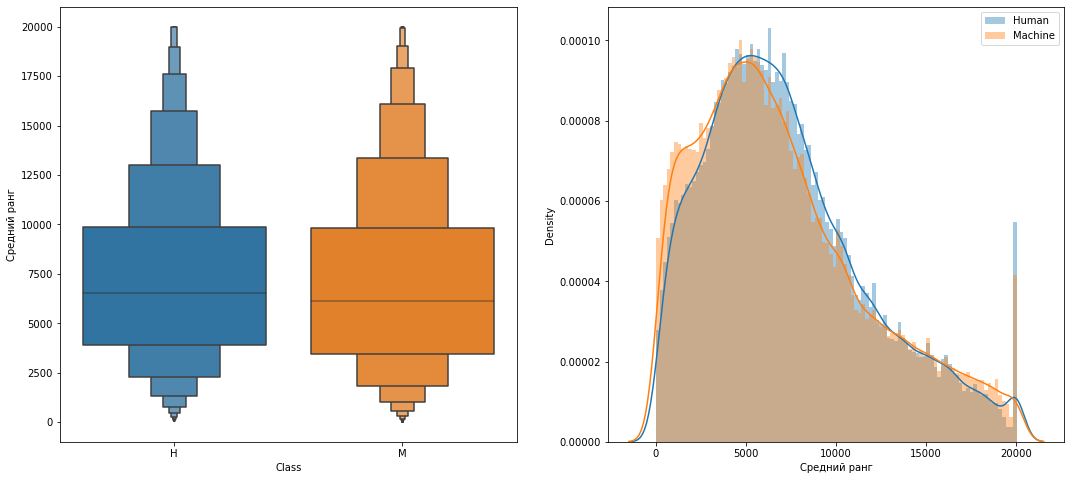

           Среднее  Медиана  Стандартное отклонение     Дисперсия
Class                                                            
H      7272.140947  6513.17             4525.874012  2.048354e+07
M      7064.240363  6144.18             4755.879496  2.261839e+07

T-test:  Есть значимое отличие в средних, pvalue = 0.00
Mann-Whitneyu:  Есть значимое отличие в средних, pvalue = 0.00


In [108]:
analyze_feature(df, 'Средний ранг')

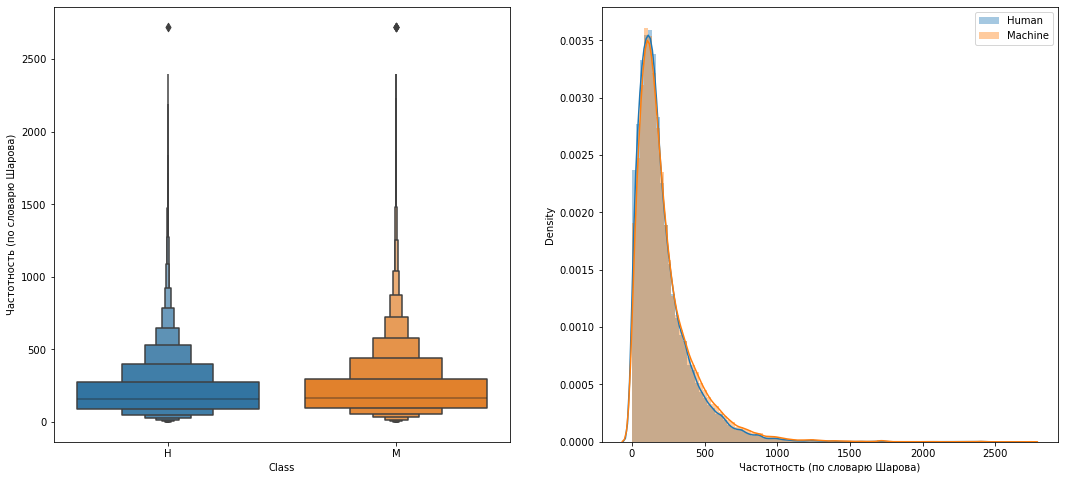

          Среднее  Медиана  Стандартное отклонение     Дисперсия
Class                                                           
H      209.115942  158.350              185.584480  34441.599085
M      228.080847  167.825              207.244796  42950.405617

T-test:  Есть значимое отличие в средних, pvalue = 0.00
Mann-Whitneyu:  Есть значимое отличие в средних, pvalue = 0.00


In [112]:
analyze_feature(df, 'Частотность (по словарю Шарова)')

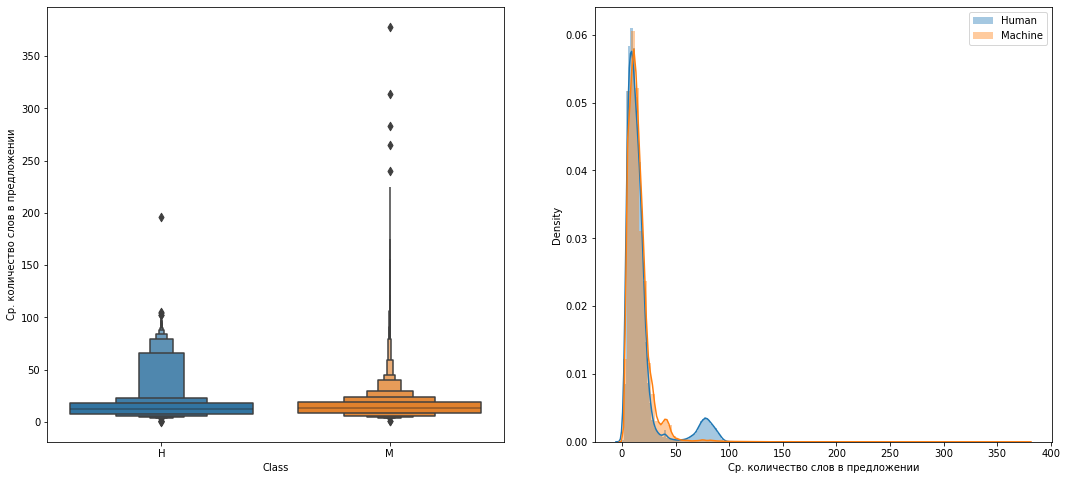

         Среднее  Медиана  Стандартное отклонение   Дисперсия
Class                                                        
H      17.167641     12.0               17.912789  320.868022
M      15.198810     13.0               10.889918  118.590314

T-test:  Есть значимое отличие в средних, pvalue = 0.00
Mann-Whitneyu:  Есть значимое отличие в средних, pvalue = 0.00


In [113]:
analyze_feature(df, 'Ср. количество слов в предложении')

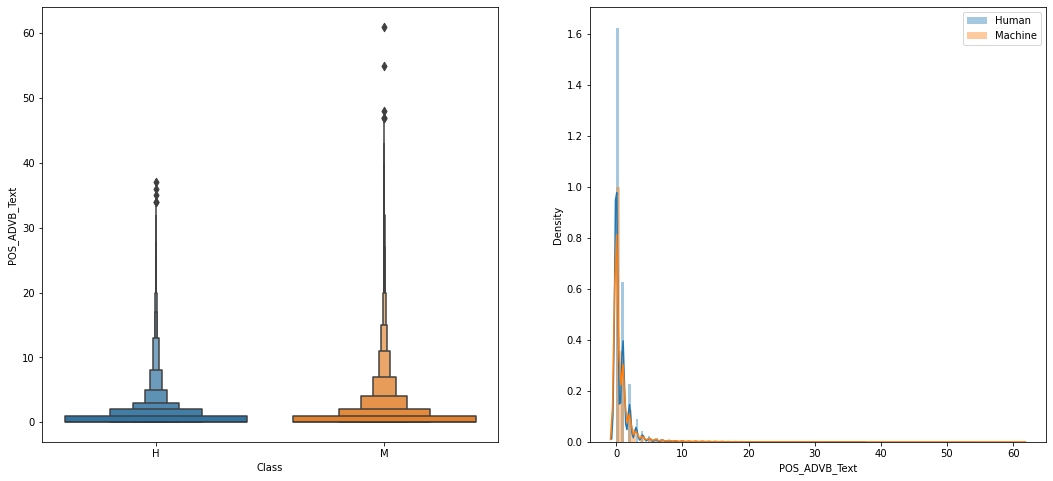

        Среднее  Медиана  Стандартное отклонение  Дисперсия
Class                                                      
H      0.902458      0.0                2.150110   4.622973
M      1.035053      0.0                2.717997   7.387507

T-test:  Есть значимое отличие в средних, pvalue = 0.00
Mann-Whitneyu:  Значимого отличия нет, pvalue = 0.19


In [114]:
analyze_feature(df, 'POS_ADVB_Text')

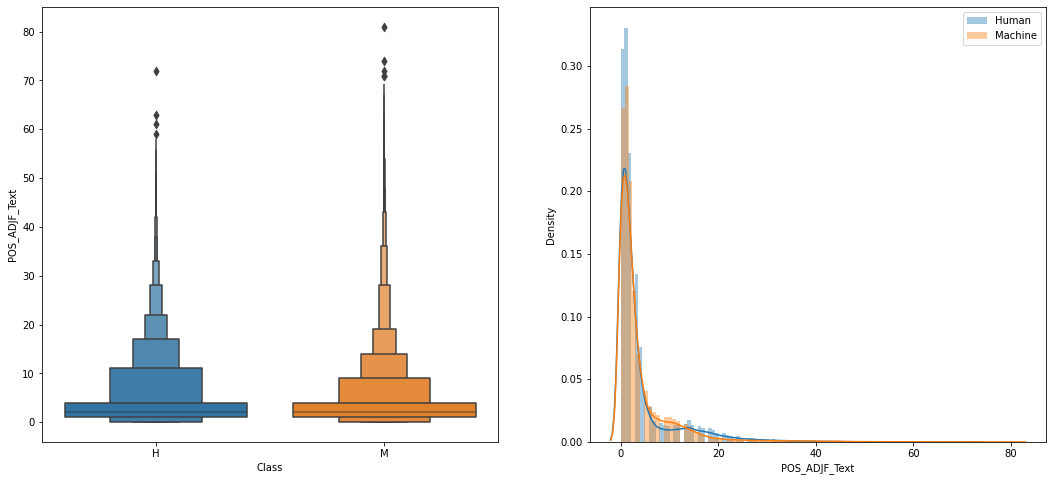

        Среднее  Медиана  Стандартное отклонение  Дисперсия
Class                                                      
H      4.114994      2.0                6.551871  42.927007
M      3.956938      2.0                6.343067  40.234501

T-test:  Есть значимое отличие в средних, pvalue = 0.00
Mann-Whitneyu:  Есть значимое отличие в средних, pvalue = 0.00


In [116]:
analyze_feature(df, 'POS_ADJF_Text')

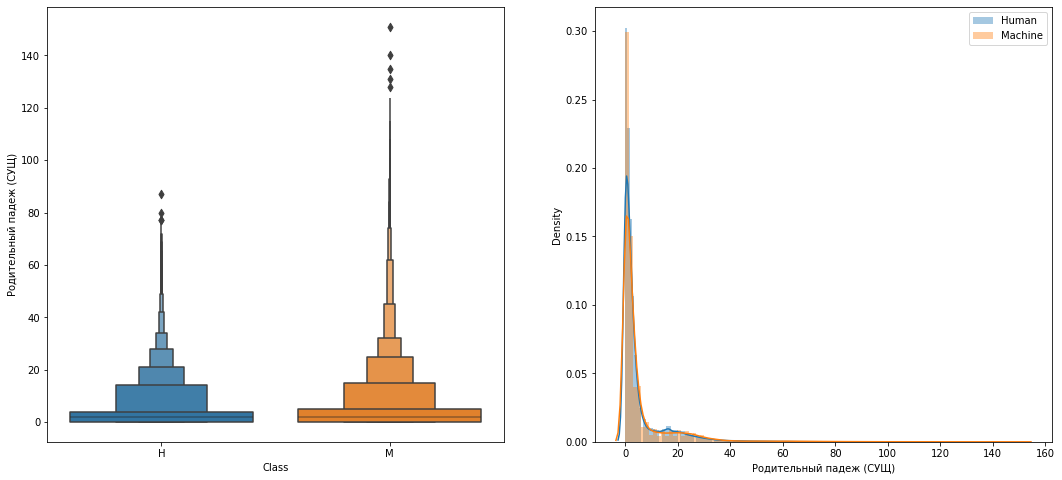

        Среднее  Медиана  Стандартное отклонение   Дисперсия
Class                                                       
H      4.950060      2.0                8.415928   70.827842
M      5.733775      2.0               10.960399  120.130345

T-test:  Есть значимое отличие в средних, pvalue = 0.00
Mann-Whitneyu:  Есть значимое отличие в средних, pvalue = 0.00


In [122]:
analyze_feature(df, 'Родительный падеж (СУЩ)')

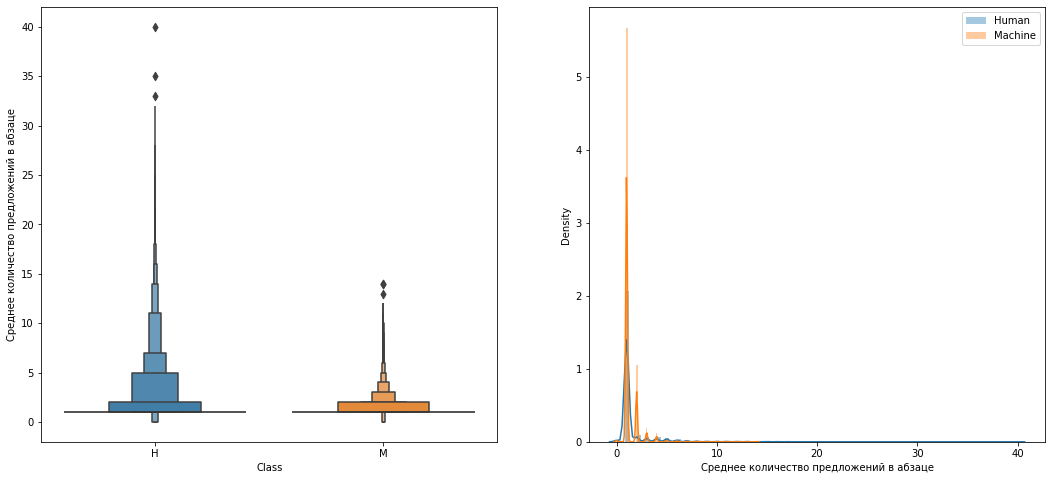

        Среднее  Медиана  Стандартное отклонение  Дисперсия
Class                                                      
H      1.669257        1                2.202155   4.849486
M      1.304439        1                0.810310   0.656602

T-test:  Есть значимое отличие в средних, pvalue = 0.00
Mann-Whitneyu:  Есть значимое отличие в средних, pvalue = 0.00


In [136]:
analyze_feature(df, 'Среднее количество предложений в абзаце')

In [124]:
df_class_vec = df.copy()
df_class_vec['Class'] = df_class_vec['Class'].map({'H': 0, 'M': 1})

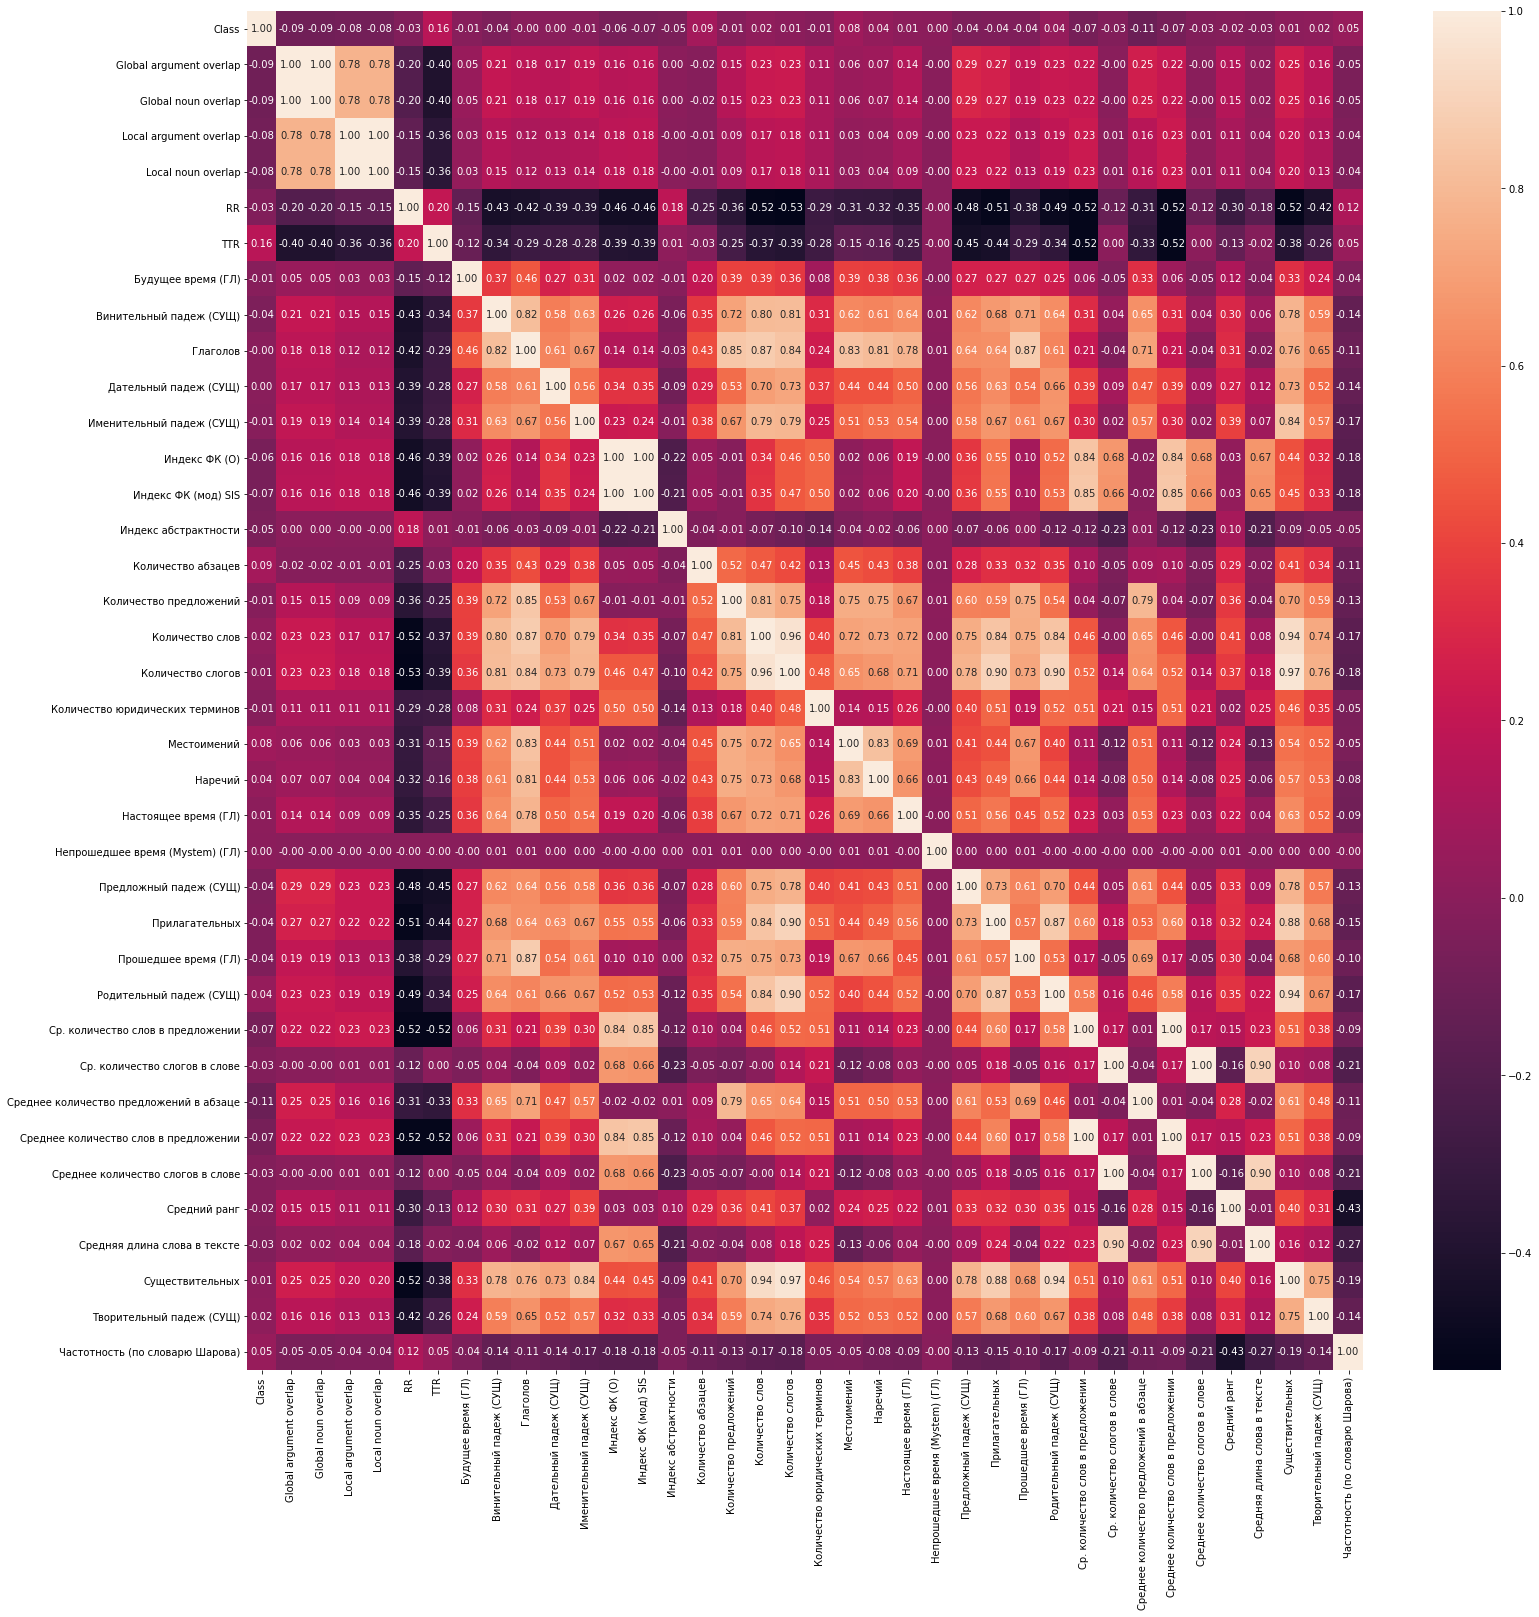

In [135]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_class_vec[[col for col in list(df_class_vec) if '_Text' not in col and 'Id' not in col]].corr(), annot=True, fmt='.2f')
plt.show()

Корреляция по Пирсону:

- у RR и TTR высокая корреляция практически со всеми фичами у Н (у М есть корреляция RR и многих фичей, но менее ярко выражена)

RR=(1/(corpora_size*corpora_size))*frequency_squares

TTR=len(freqs)/corpora_size

- у unique tokens высокая корреляция с др. фичами: prep, adjf,noun, none, len_text, ср. колво слов в предложении, предложный падеж,родительный, TTR, индекс ФК (мод), индекс ФК (О), существительные, прилагательные, колво слов, слогов (у М корреляция слабая)

- count_kirr и count_space - корреляция выше у М

- count_lat и mean_en_vowel_occurrence, mean_en_consonant_occurrence - корреляция выше у М

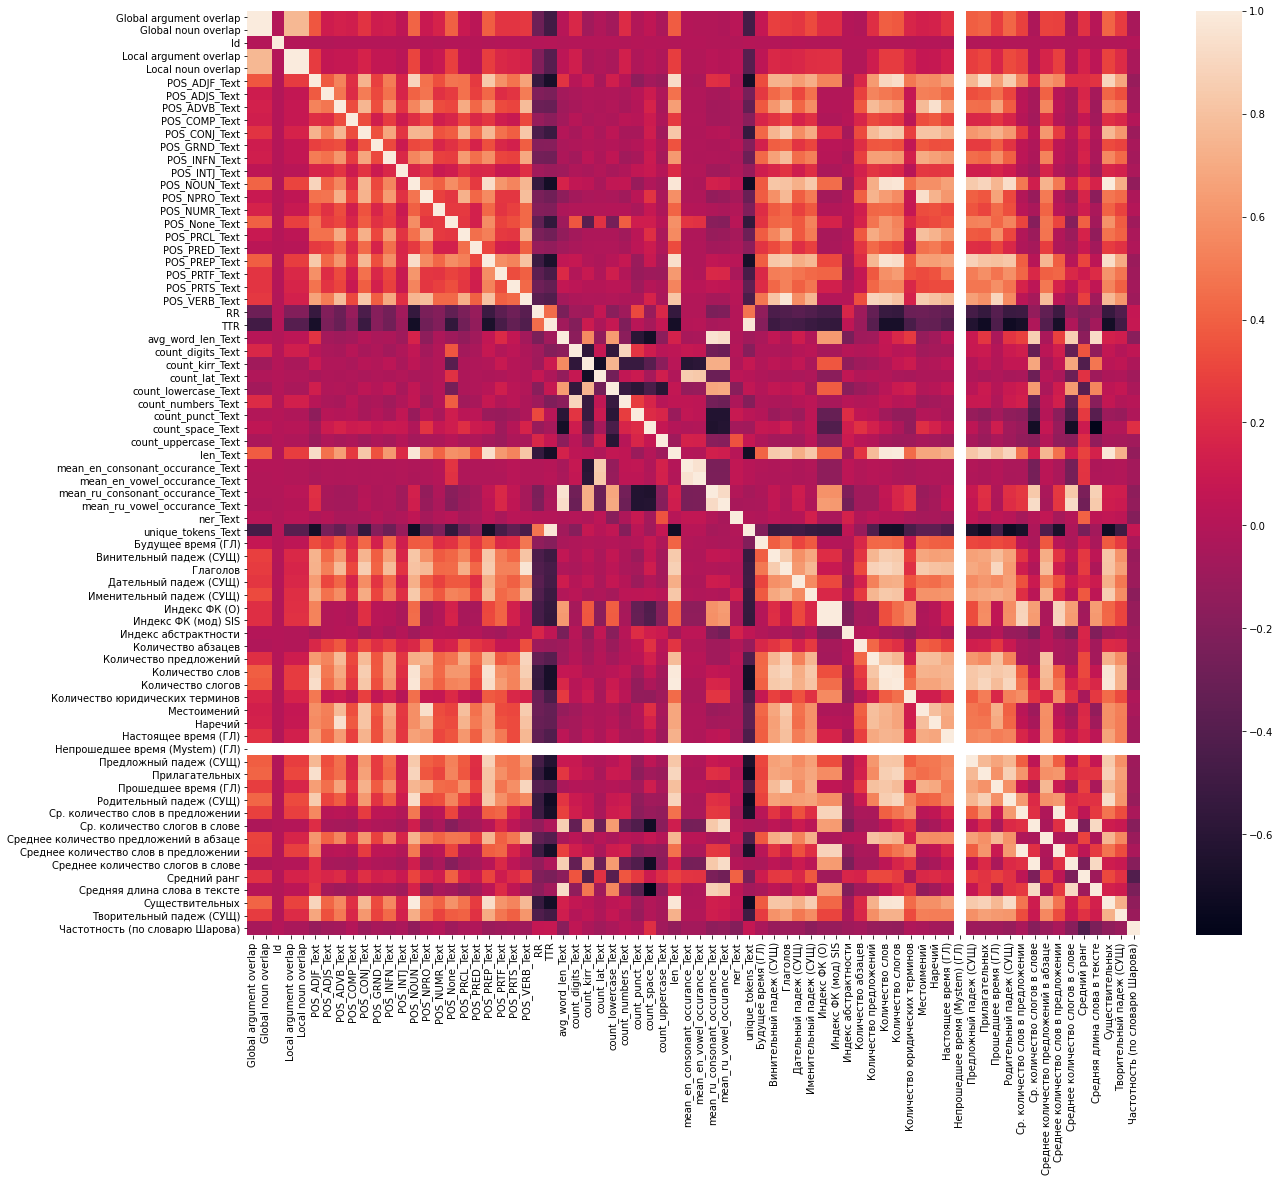

In [137]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[df['Class'] == 'H'].corr())
plt.show()

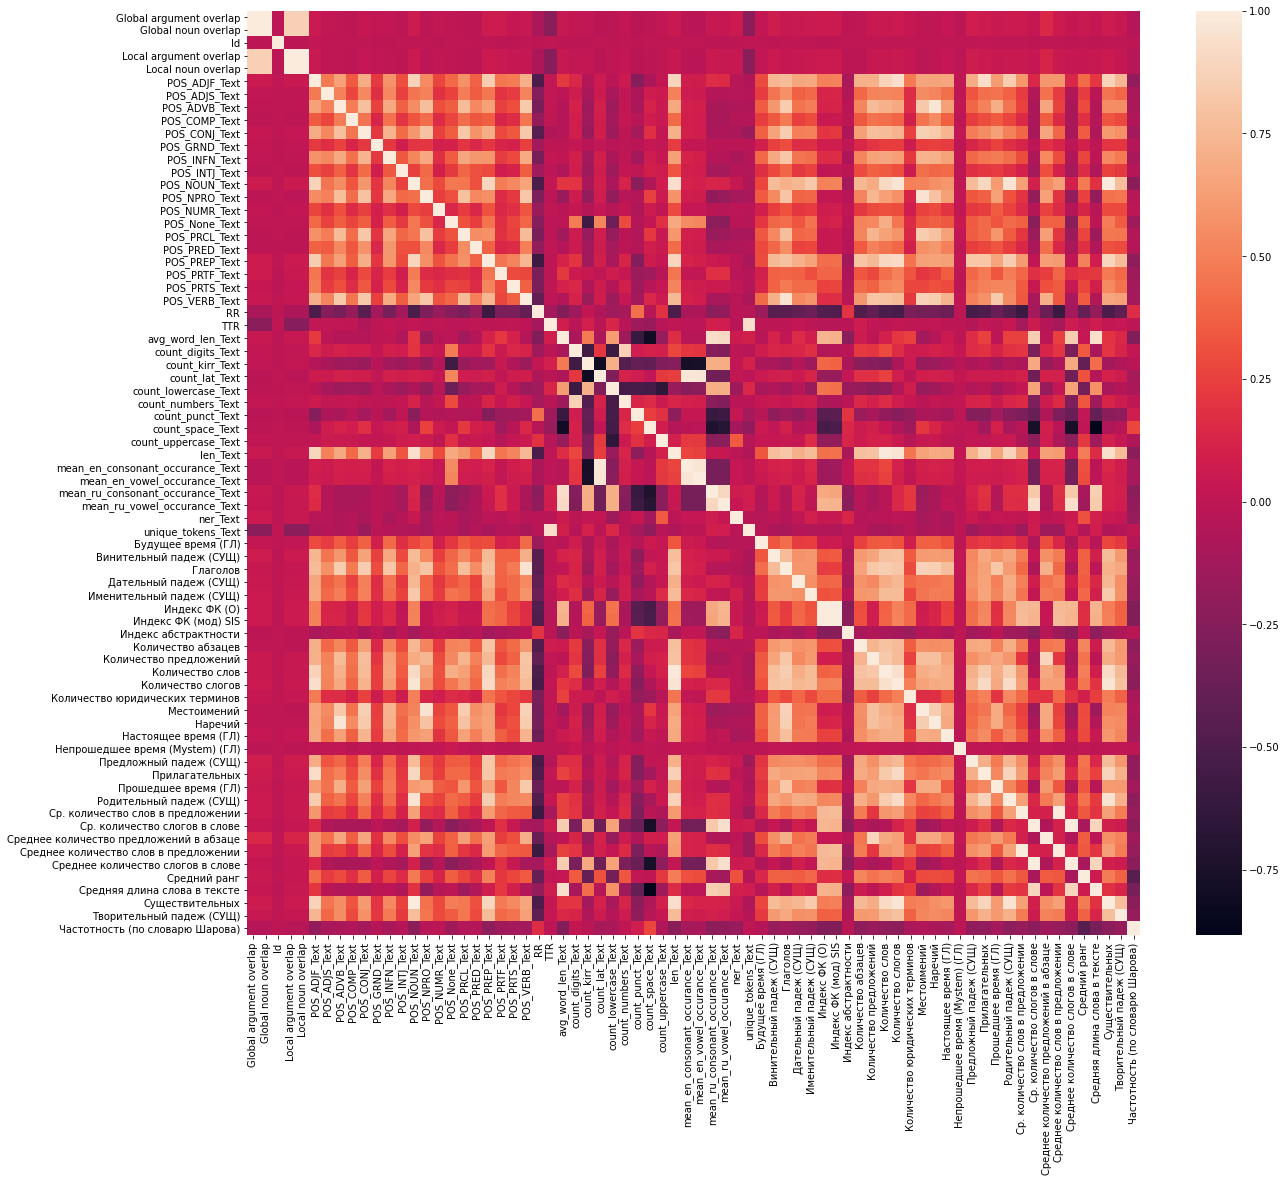

In [138]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[df['Class'] == 'M'].corr())
plt.show()

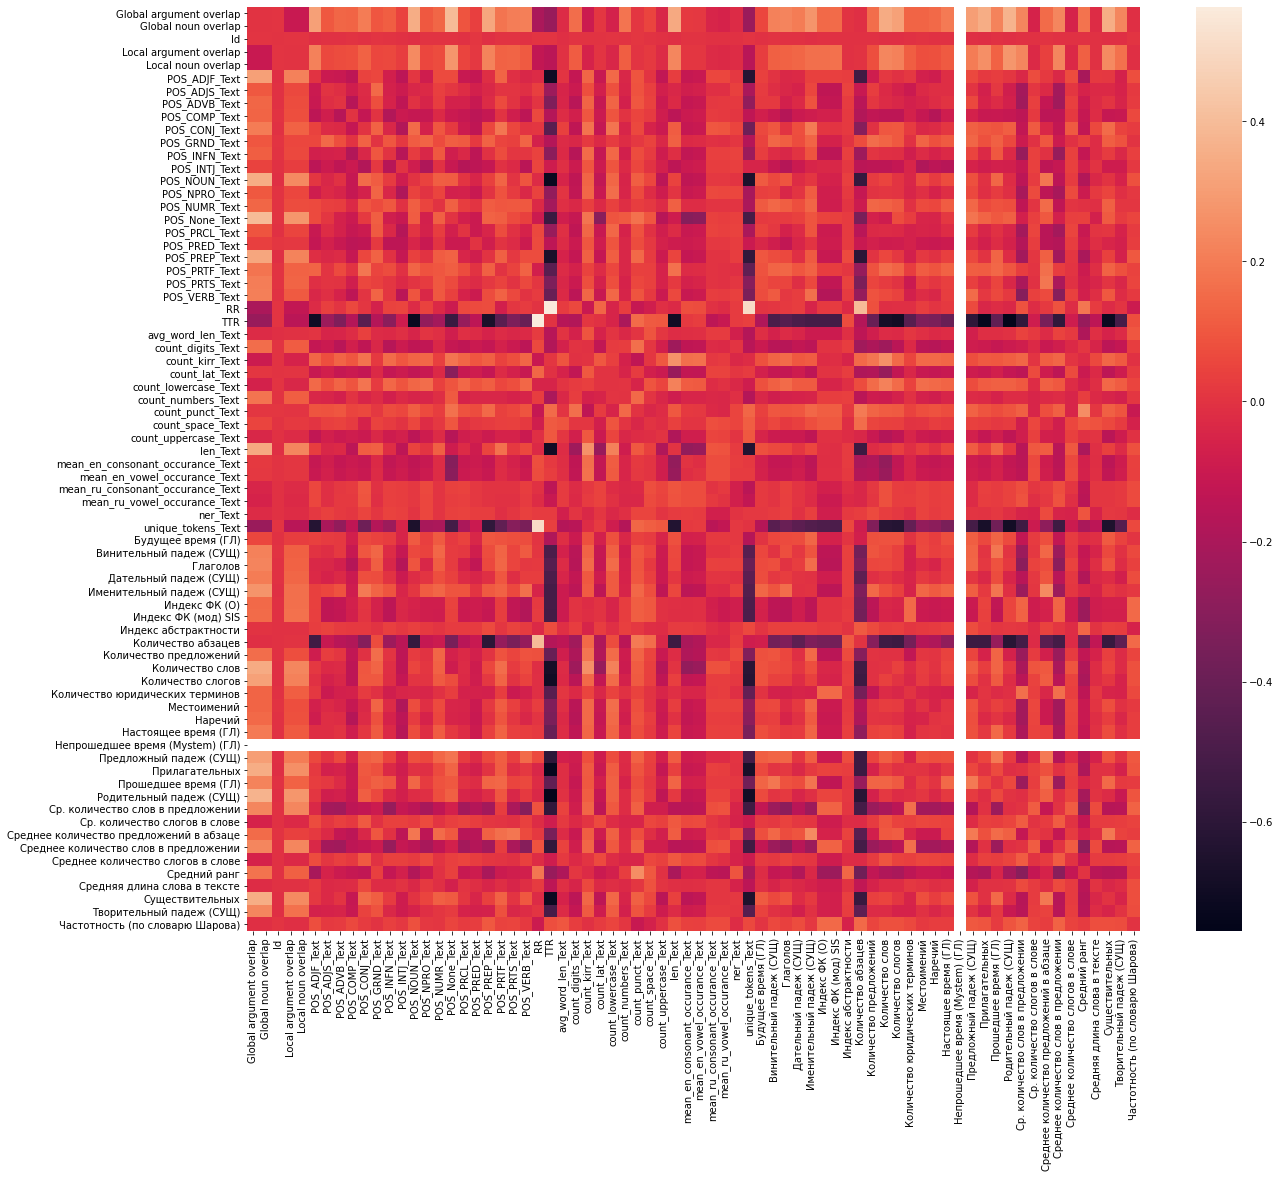

In [143]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[df['Class'] == 'H'].corr() - df[df['Class'] == 'M'].corr())
plt.show()

Корреляция по Кендаллу:
- тоже прослеживается высокая корреляция между RR TTR и практически всеми фичами (у Н сильнее)
- у Н более сильная корреляция между фичами local noun overap, global noun overlap, local argument overlap, global argument overlap (критерий связности в суммаризаторах) и всеми, кроме ср. количества слогов в слове, частотности Шарова, индекса абстрактности, средней длины слова, count_punct, count_uppercase, count_loercase, avd_word_len, mean_ru_vowel_occurance, mean_ru_consonant_occurance, count_kirr

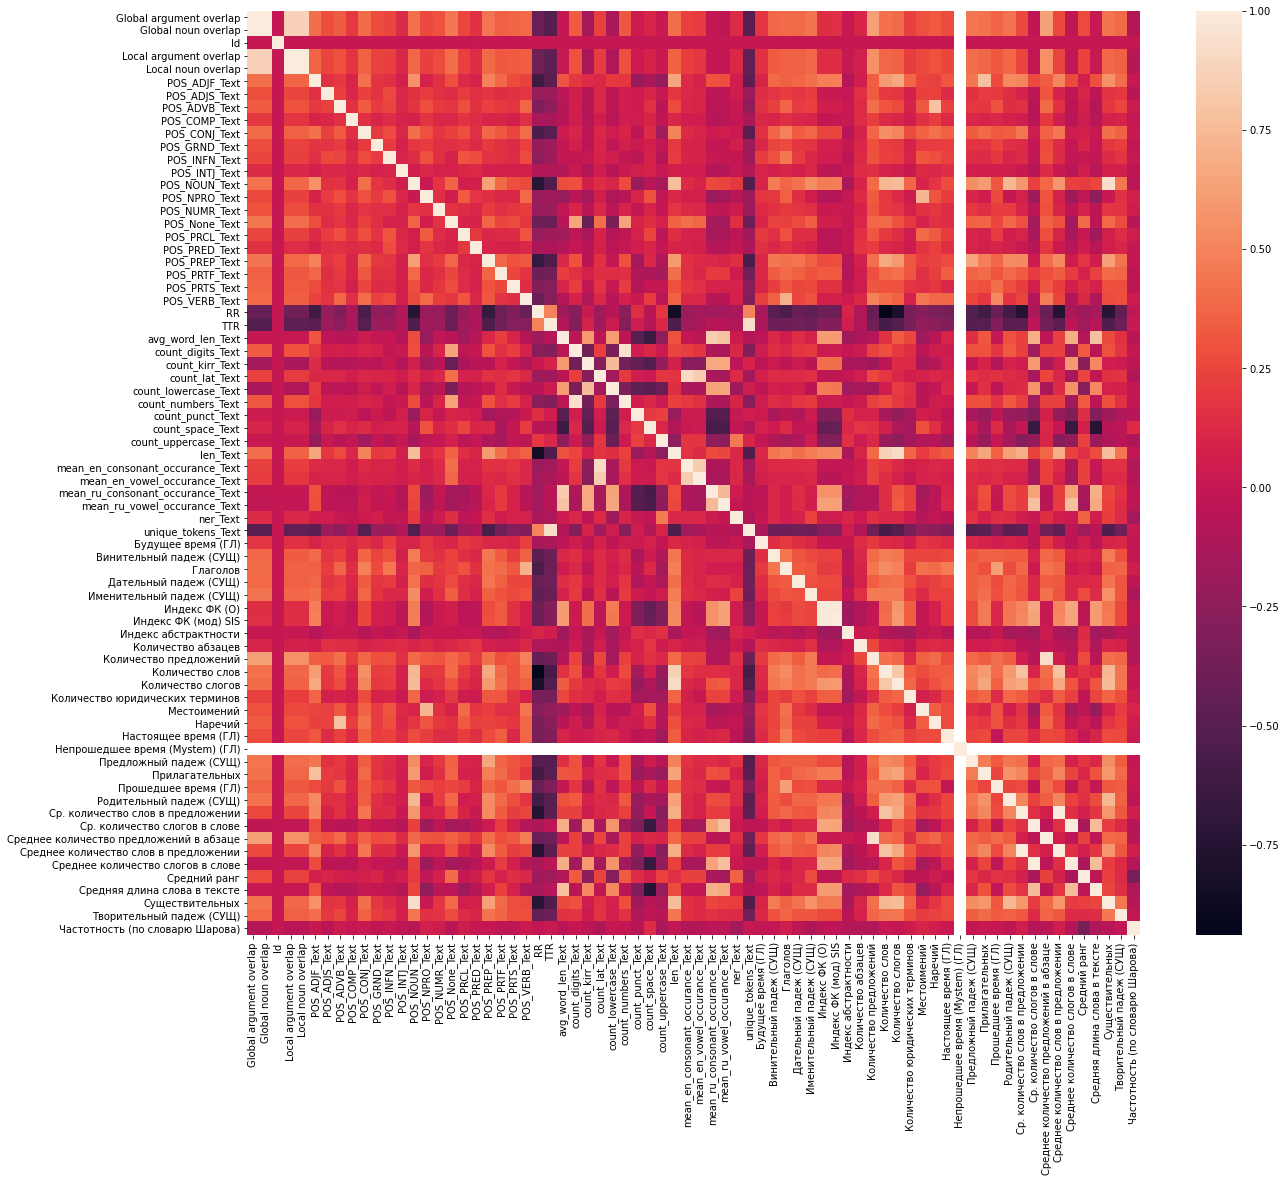

In [139]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[df['Class'] == 'H'].corr(method='kendall'))
plt.show()

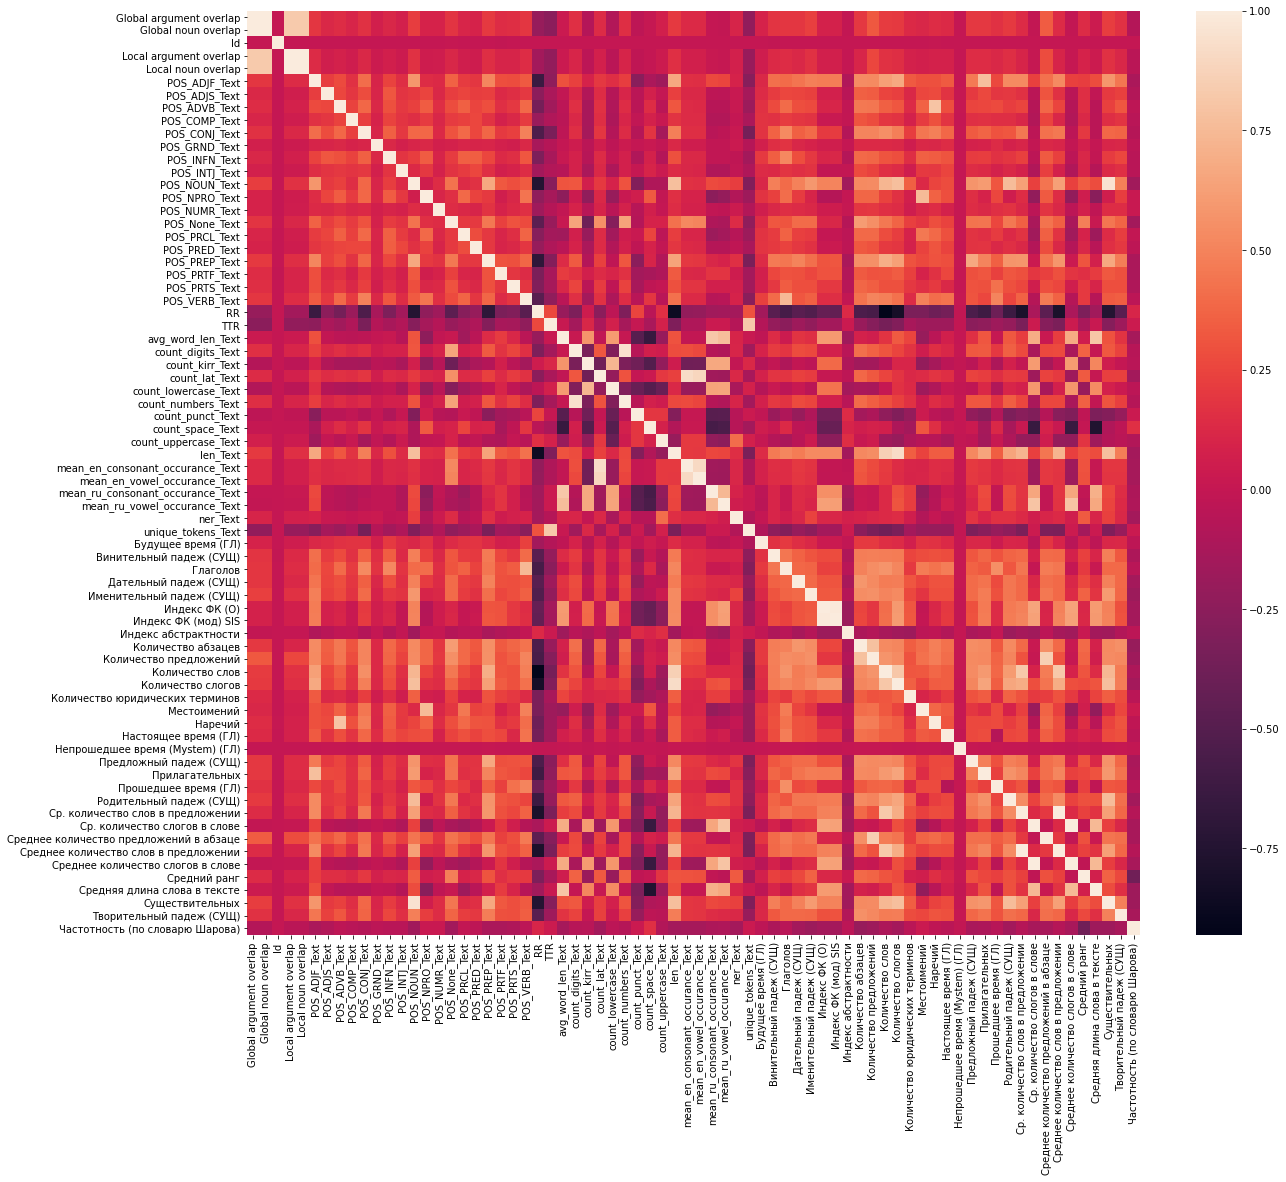

In [140]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[df['Class'] == 'M'].corr(method='kendall'))
plt.show()

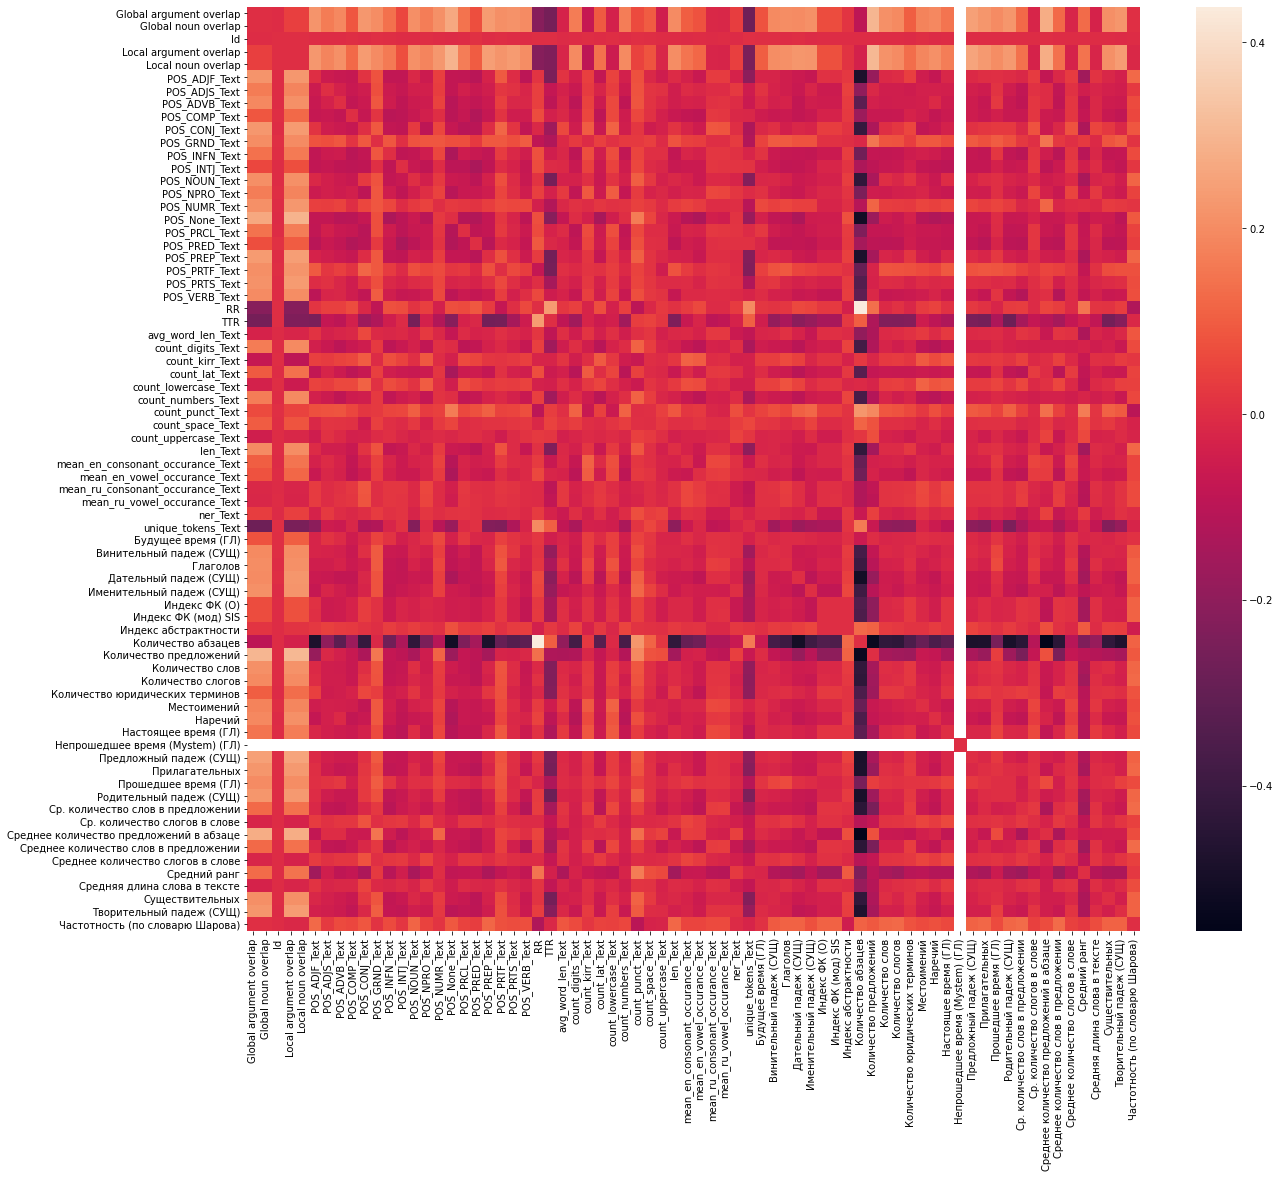

In [142]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[df['Class'] == 'H'].corr(method='kendall') - df[df['Class'] == 'M'].corr(method='kendall'))
plt.show()

In [146]:
(df[df['Class'] == 'H'].corr(method='kendall') - df[df['Class'] == 'M'].corr(method='kendall')).mean(axis=1)

Global argument overlap            0.105874
Global noun overlap                0.105874
Id                                -0.001645
Local argument overlap             0.117005
Local noun overlap                 0.117005
                                     ...   
Средний ранг                      -0.063984
Средняя длина слова в тексте      -0.016058
Существительных                   -0.021728
Творительный падеж (СУЩ)          -0.023349
Частотность (по словарю Шарова)    0.054823
Length: 72, dtype: float64

Корреляция по Спирману:

- в отличие от М у Н есть корреляция между количеством абзацев и POS-тегами + падежными фичами

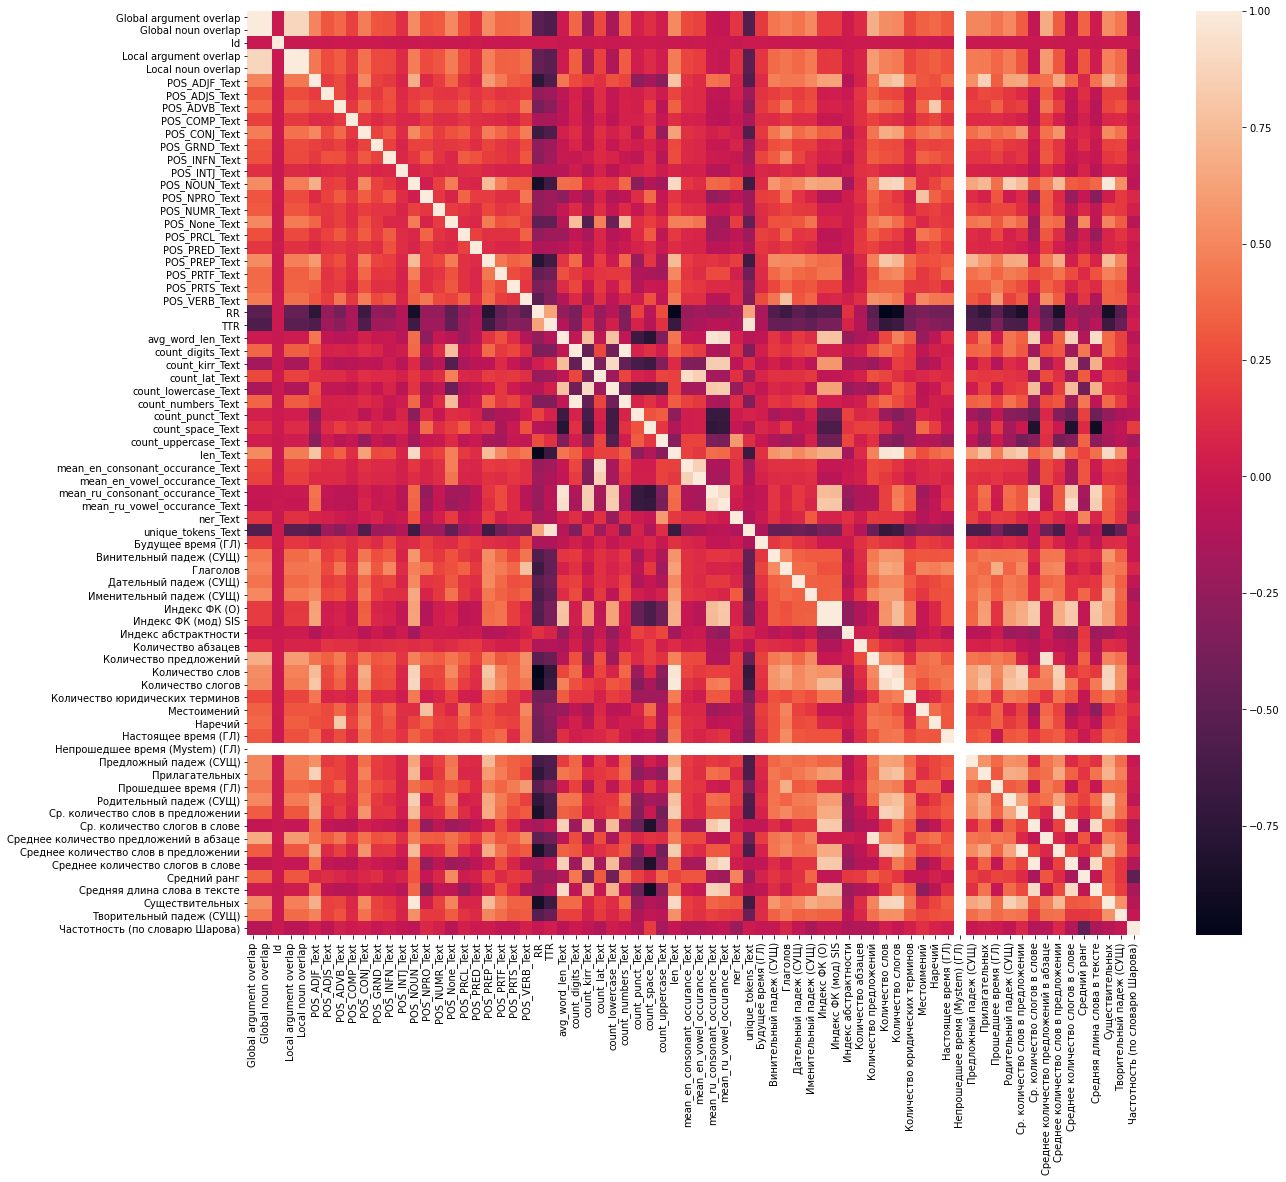

In [156]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[df['Class'] == 'H'].corr(method='spearman'))
plt.show()

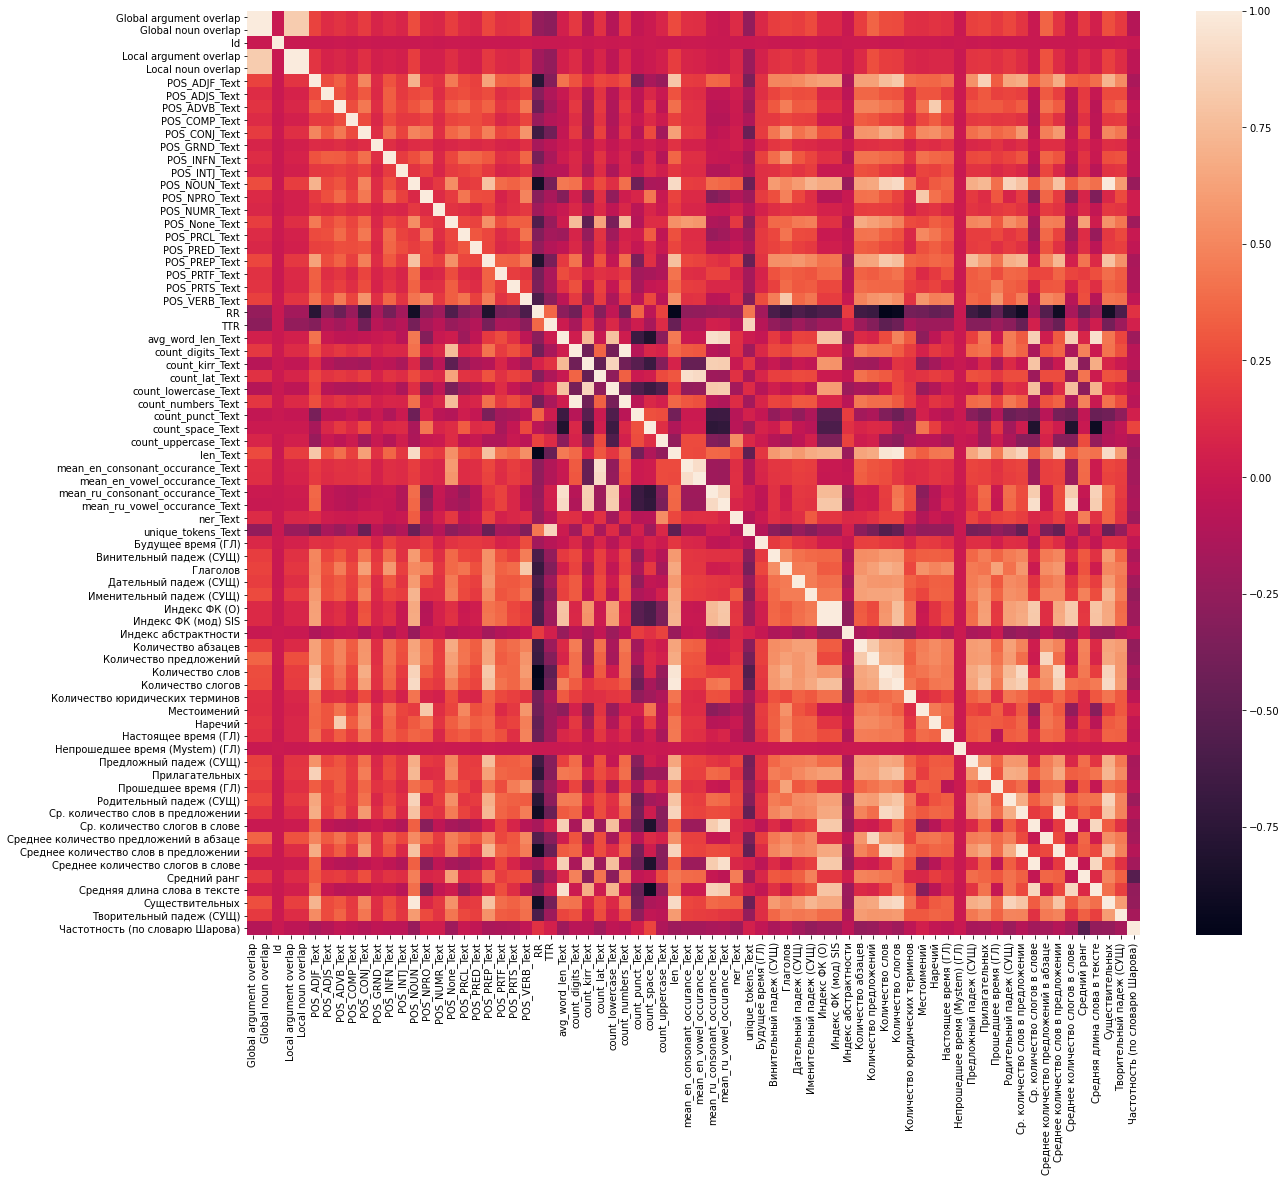

In [157]:
plt.figure(figsize=(20, 17))
sns.heatmap (df[df['Class'] == 'M'].corr(method='spearman'))
plt.show()

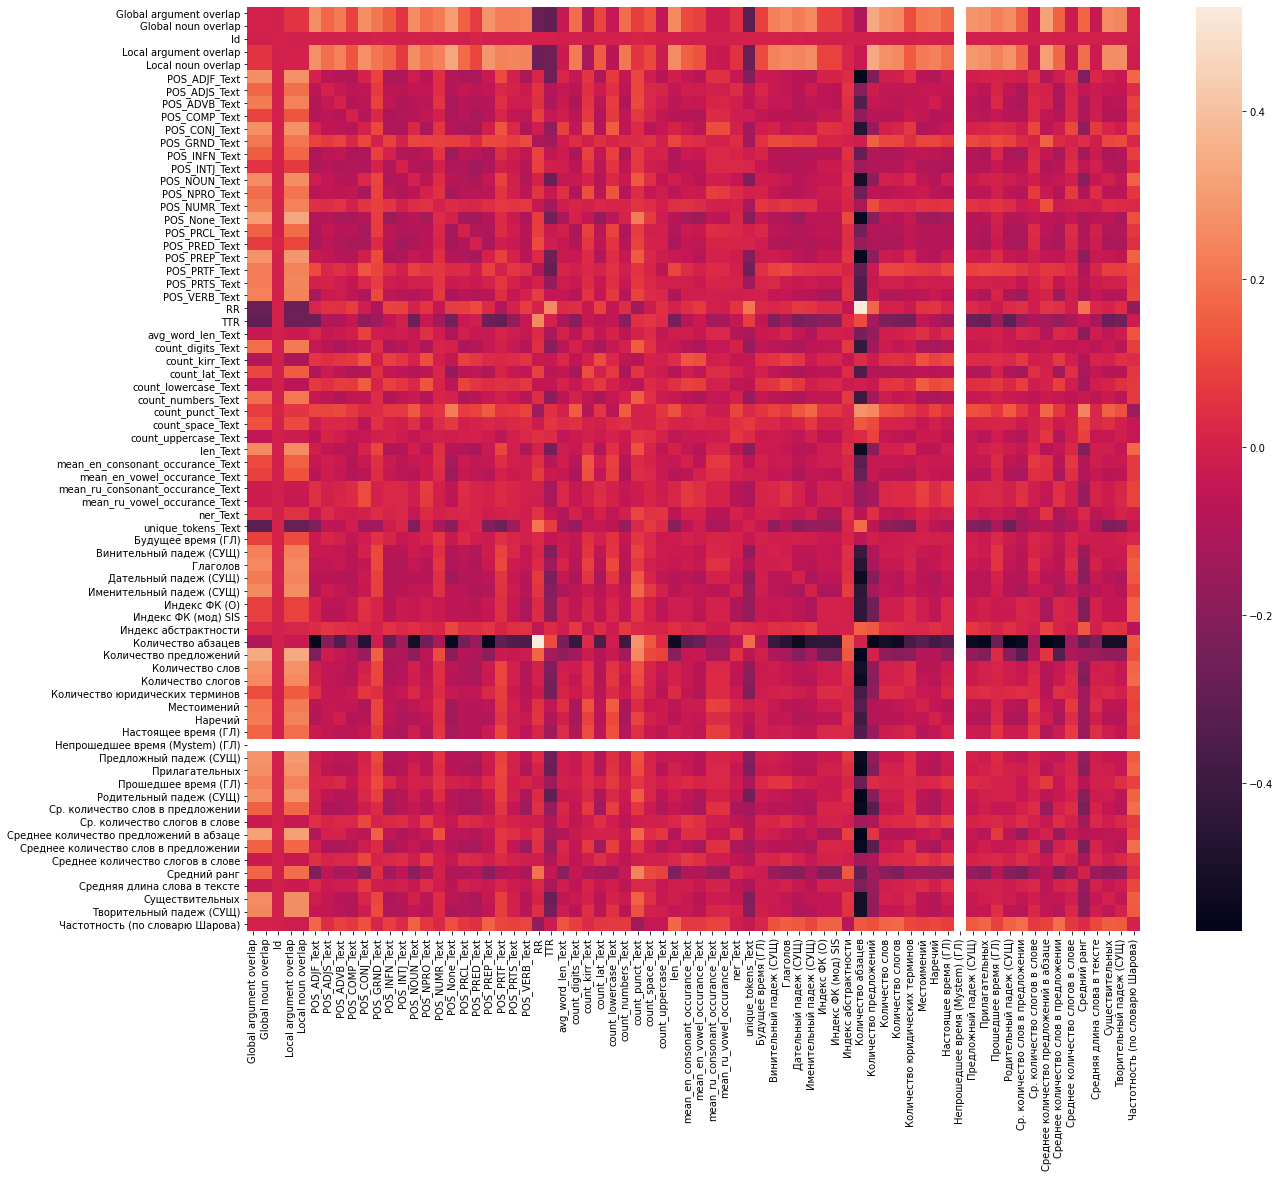

In [141]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[df['Class'] == 'H'].corr(method='spearman') - df[df['Class'] == 'M'].corr(method='spearman'))
plt.show()

На основе самых высоких показателей корреляции, различающихся у М и Н, строим графики распределений.

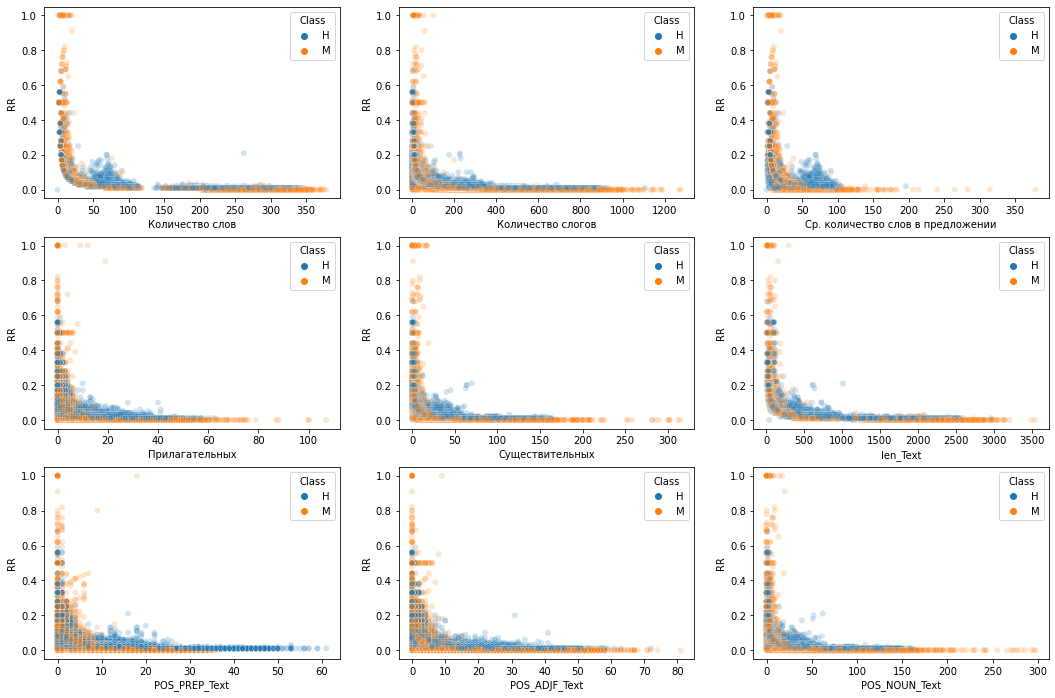

In [158]:
plt.figure(figsize=(18, 12))

plt.subplot(331)
ax = sns.scatterplot(data=df, x="Количество слов", y="RR", hue="Class", alpha=0.2)

plt.subplot(332)
ax = sns.scatterplot(data=df, x="Количество слогов", y="RR", hue="Class", alpha=0.2)

plt.subplot(333)
ax = sns.scatterplot(data=df, x="Ср. количество слов в предложении", y="RR", hue="Class", alpha=0.2)

plt.subplot(334)
ax = sns.scatterplot(data=df, x="Прилагательных", y="RR", hue="Class", alpha=0.2)

plt.subplot(335)
ax = sns.scatterplot(data=df, x="Существительных", y="RR", hue="Class", alpha=0.2)

plt.subplot(336)
ax = sns.scatterplot(data=df, x="len_Text", y="RR", hue="Class", alpha=0.2)

plt.subplot(337)
ax = sns.scatterplot(data=df, x="POS_PREP_Text", y="RR", hue="Class", alpha=0.2)

plt.subplot(338)
ax = sns.scatterplot(data=df, x="POS_ADJF_Text", y="RR", hue="Class", alpha=0.2)

plt.subplot(339)
ax = sns.scatterplot(data=df, x="POS_NOUN_Text", y="RR", hue="Class", alpha=0.2)

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(331)
ax = sns.scatterplot(data=df, x="Количество слов", y="TTR", hue="Class", alpha=0.2)

plt.subplot(332)
ax = sns.scatterplot(data=df, x="Количество слогов", y="TTR", hue="Class", alpha=0.2)

plt.subplot(333)
ax = sns.scatterplot(data=df, x="Ср. количество слов в предложении", y="TTR", hue="Class", alpha=0.2)

plt.subplot(334)
ax = sns.scatterplot(data=df, x="Прилагательных", y="TTR", hue="Class", alpha=0.2)

plt.subplot(335)
ax = sns.scatterplot(data=df, x="Существительных", y="TTR", hue="Class", alpha=0.2)

plt.subplot(336)
ax = sns.scatterplot(data=df, x="Родительный падеж (СУЩ)", y="TTR", hue="Class", alpha=0.2)

plt.subplot(337)
ax = sns.scatterplot(data=df, x="Предложный падеж (СУЩ)", y="TTR", hue="Class", alpha=0.2)

plt.subplot(338)
ax = sns.scatterplot(data=df, x="len_Text", y="TTR", hue="Class", alpha=0.2)

plt.subplot(339)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="TTR", hue="Class", alpha=0.2)

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(331)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Количество слов", hue="Class", alpha=0.2)

plt.subplot(332)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Количество слогов", hue="Class", alpha=0.2)

plt.subplot(333)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Ср. количество слов в предложении", hue="Class", alpha=0.2)

plt.subplot(334)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Прилагательных", hue="Class", alpha=0.2)

plt.subplot(335)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Существительных", hue="Class", alpha=0.2)

plt.subplot(336)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Индекс ФК (мод) SIS", hue="Class", alpha=0.2)

plt.subplot(337)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Индекс ФК (О)", hue="Class", alpha=0.2)

plt.subplot(338)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Именительный падеж (СУЩ)", hue="Class", alpha=0.2)

plt.subplot(339)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Родительный падеж (СУЩ)", hue="Class", alpha=0.2)

In [ ]:
plt.figure(figsize=(18, 12))

plt.subplot(331)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="Предложный падеж (СУЩ)", hue="Class", alpha=0.2)

plt.subplot(332)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="len_Text", hue="Class", alpha=0.2)

plt.subplot(333)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="POS_PREP_Text", hue="Class", alpha=0.2)

plt.subplot(334)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="POS_ADJF_Text", hue="Class", alpha=0.2)

plt.subplot(335)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="POS_NOUN_Text", hue="Class", alpha=0.2)

plt.subplot(336)
ax = sns.scatterplot(data=df, x="unique_tokens_Text", y="POS_CONJ_Text", hue="Class", alpha=0.2)

plt.subplot(337)
ax = sns.scatterplot(data=df, x="count_kirr_Text", y="count_space_Text", hue="Class", alpha=0.2)

plt.subplot(338)
ax = sns.scatterplot(data=df, x="count_lat_Text", y="mean_en_consonant_occurance_Text", hue="Class", alpha=0.2)

plt.subplot(339)
ax = sns.scatterplot(data=df, x="count_lat_Text", y="mean_en_consonant_occurance_Text", hue="Class", alpha=0.2)

In [ ]:
ax = sns.countplot(data=df, x="Количество слов", y="RR", hue="Class", alpha=0.2)

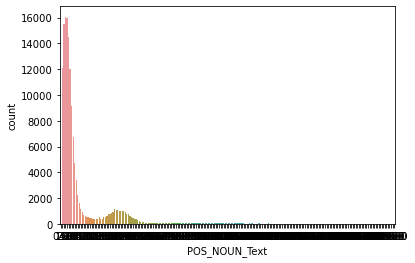

In [149]:
sns.countplot(df['POS_NOUN_Text'])
plt.show()

In [155]:
df['POS_NOUN_Text'].value_counts(normalize=True).sort_values(ascending=False).head(50)

3.0     0.106729
4.0     0.106225
2.0     0.102811
5.0     0.096422
1.0     0.080311
6.0     0.079886
7.0     0.060799
8.0     0.044529
0.0     0.034653
9.0     0.031552
10.0    0.022500
11.0    0.014949
12.0    0.010712
35.0    0.007817
13.0    0.007737
36.0    0.006980
37.0    0.006920
40.0    0.006893
39.0    0.006794
38.0    0.006774
41.0    0.006508
42.0    0.006229
34.0    0.006223
14.0    0.006090
33.0    0.005718
43.0    0.005320
32.0    0.005306
31.0    0.005100
44.0    0.004875
15.0    0.004788
16.0    0.004264
45.0    0.004237
30.0    0.004071
29.0    0.003799
17.0    0.003772
25.0    0.003726
46.0    0.003593
28.0    0.003586
18.0    0.003394
19.0    0.003081
47.0    0.003055
20.0    0.002842
27.0    0.002769
26.0    0.002696
21.0    0.002603
22.0    0.002597
24.0    0.002590
48.0    0.002563
49.0    0.002451
23.0    0.002364
Name: POS_NOUN_Text, dtype: float64